In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the healthcare dataset

data = pd.read_csv(r"C:\Users\evanj\Downloads\BCA Files\ML\ml_dataset\healthcare_dataset.csv\healthcare_dataset.csv")

# Display basic dataset information
print("Dataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
mem

In [2]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:
# Select a target variable (e.g., 'Medical Condition') and preprocess categorical features
target_column = 'Medical Condition'  # Replace with your categorical target column
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

# Encode categorical columns in features and target
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Encode the target variable
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train the Naïve Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Display results
print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)



Model Accuracy: 0.1671171171171171

Confusion Matrix:
 [[242 196 427 338 359 300]
 [241 208 431 308 341 308]
 [258 213 419 299 356 300]
 [248 187 389 356 376 305]
 [253 203 405 349 356 283]
 [243 170 459 342 358 274]]

Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.13      0.14      1862
           1       0.18      0.11      0.14      1837
           2       0.17      0.23      0.19      1845
           3       0.18      0.19      0.18      1861
           4       0.17      0.19      0.18      1849
           5       0.15      0.15      0.15      1846

    accuracy                           0.17     11100
   macro avg       0.17      0.17      0.16     11100
weighted avg       0.17      0.17      0.16     11100



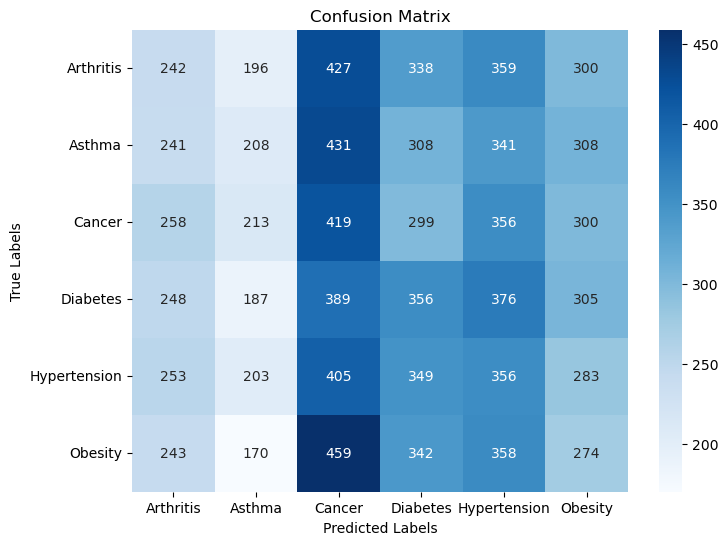

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Plot Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

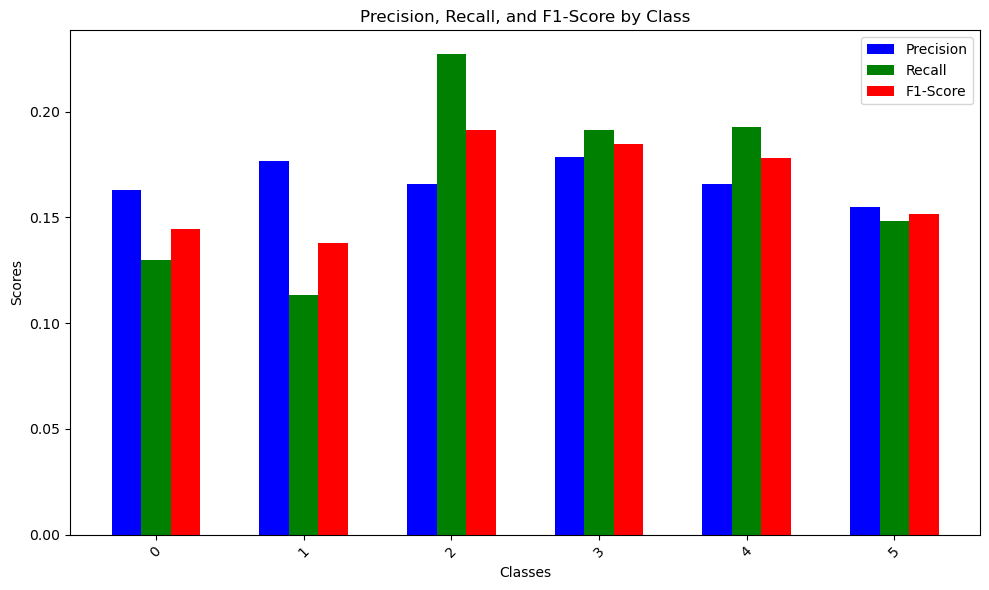

In [10]:
# Classification Report as Bar Chart
report = classification_report(y_test, y_pred, output_dict=True)
categories = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

precision = [report[category]["precision"] for category in categories]
recall = [report[category]["recall"] for category in categories]
f1_score = [report[category]["f1-score"] for category in categories]

x = range(len(categories))

plt.figure(figsize=(10, 6))
plt.bar(x, precision, width=0.2, label="Precision", color="blue", align="center")
plt.bar([i + 0.2 for i in x], recall, width=0.2, label="Recall", color="green", align="center")
plt.bar([i + 0.4 for i in x], f1_score, width=0.2, label="F1-Score", color="red", align="center")

plt.xlabel("Classes")
plt.ylabel("Scores")
plt.title("Precision, Recall, and F1-Score by Class")
plt.xticks([i + 0.2 for i in x], categories, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ROC Curve (for binary classification)
if len(target_encoder.classes_) == 2:
    y_prob = nb_model.predict_proba(X_test)[:, 1]  # Probability for positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()